# Cleaning US Census Data

## Inspect the Data!

1. The first visualization my boss wants me to make is a scatterplot that shows average income in a state vs proportion of women in that state.

   I open some of the census `csv` files that came with the kit you downloaded.

2. It will be easier to inspect this data once we have it in a DataFrame. I can't even call `.head()` on these `csv`s!

   Using `glob`, loop through the census files available and load them into DataFrames. Then, I concatenate all of those DataFrames together into one DataFrame, called something like `us_census`.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

files = glob.glob("states*.csv")
df_list = []

for file in files:
  df = pd.read_csv(file)
  df_list.append(df)

us_census = pd.concat(df_list)
us_census

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,"$64,657.80",2648667M_2630239F
1,1,Connecticut,3593222,15.60%,67.68%,10.35%,0.13%,4.02%,0.02%,"$76,146.56",1751607M_1841615F
2,2,Delaware,926454,8.82%,64.63%,20.74%,0.26%,3.27%,NaN,"$61,827.98",448413M_478041F
3,3,District of Columbia,647484,9.17%,33.10%,51.78%,0.20%,3.38%,0.03%,"$75,466.36",306674M_340810F
4,4,Florida,19645772,21.34%,59.08%,15.17%,0.21%,2.28%,0.05%,"$50,690.19",9600009M_10045763F
5,5,Georgia,10006693,8.42%,54.29%,32.09%,0.19%,3.10%,0.05%,"$50,811.08",4883331M_5123362F
0,0,Maryland,5930538,8.47%,52.68%,30.68%,0.20%,5.33%,0.04%,"$78,765.40",2872643M_F
1,1,Massachusetts,6705586,11.46%,73.04%,6.83%,0.13%,5.84%,0.02%,"$72,838.94",3249650M_3455936F
2,2,Michigan,9900571,4.63%,72.38%,17.63%,0.48%,2.42%,0.02%,"$51,201.83",4861973M_5038598F
3,3,Minnesota,5419171,5.15%,81.43%,5.66%,1.07%,4.16%,0.03%,"$62,820.83",2692166M_2727005F


3. Look at the `.columns` and the `.dtypes` of the `us_census` DataFrame. Are those datatypes going to hinder you as you try to make histograms?

In [ ]:
print(us_census.columns)
print(us_census.dtypes)

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')
Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object


4. Look at the `head()` of the DataFrame so that I can understand why some of these `dtypes` are objects instead of integers or floats.

   I start to make a plan for how to convert these columns into the right types for manipulation.

## Regex to the Rescue

5. I use regex to turn the `Income` column into a format that is ready for conversion into a numerical type.

In [ ]:
us_census["Income"] = us_census["Income"].str.replace('[\$,]', '', regex=True)
us_census["Income"] = us_census["Income"].str.replace(',', '', regex = True)
us_census["Income"] = pd.to_numeric(us_census['Income'])
us_census["Income"]

0    64657.80
1    76146.56
2    61827.98
3    75466.36
4    50690.19
5    50811.08
0    78765.40
1    72838.94
2    51201.83
3    62820.83
4    38909.92
5    49763.99
0    50811.08
1    73264.43
2    48017.32
3    59587.05
4    48616.23
5    53017.75
0    49655.25
1    48100.85
2    54271.90
3    56170.46
4    20720.54
5    59125.27
0    76581.08
1    47329.97
2    64290.75
3    49937.46
4    58188.11
5    49655.25
0    59125.27
1    46296.81
2    51805.41
3    47328.08
4    55874.52
5    63488.92
0    53017.75
1    53885.61
2    45285.80
3    44957.99
4    49181.97
5    78765.40
0    49763.99
1    47645.68
2    55916.47
3    55526.53
4    68728.86
5    76581.08
0    63488.92
1    55602.97
2    72866.01
3    64493.77
4    41437.11
5    53898.89
0    43296.36
1    70354.74
2    54207.82
3    41935.63
4    67264.78
5    64657.80
Name: Income, dtype: float64

6. Look at the `GenderPop` column. I'm going to want to separate this into two columns, the `Men` column, and the `Women` column.


In [ ]:
us_census[['Men', 'Women']] = us_census['GenderPop'].str.split('_', expand=True)

us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,64657.80,2648667M_2630239F,2648667M,2630239F
1,1,Connecticut,3593222,15.60%,67.68%,10.35%,0.13%,4.02%,0.02%,76146.56,1751607M_1841615F,1751607M,1841615F
2,2,Delaware,926454,8.82%,64.63%,20.74%,0.26%,3.27%,NaN,61827.98,448413M_478041F,448413M,478041F
3,3,District of Columbia,647484,9.17%,33.10%,51.78%,0.20%,3.38%,0.03%,75466.36,306674M_340810F,306674M,340810F
4,4,Florida,19645772,21.34%,59.08%,15.17%,0.21%,2.28%,0.05%,50690.19,9600009M_10045763F,9600009M,10045763F


7. I convert both of the columns into numerical datatypes.

   There is still an `M` or an `F` character in each entry! I should remove those before I convert.

In [ ]:
us_census['Men'] = us_census['Men'].str.replace('M', '', regex = True)
us_census['Women'] = us_census['Women'].str.replace('F', '', regex = True)
us_census['Men'] = pd.to_numeric(us_census['Men'])
us_census['Women'] = pd.to_numeric(us_census['Women'])
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,64657.80,2648667M_2630239F,2648667,2630239.0
1,1,Connecticut,3593222,15.60%,67.68%,10.35%,0.13%,4.02%,0.02%,76146.56,1751607M_1841615F,1751607,1841615.0
2,2,Delaware,926454,8.82%,64.63%,20.74%,0.26%,3.27%,NaN,61827.98,448413M_478041F,448413,478041.0
3,3,District of Columbia,647484,9.17%,33.10%,51.78%,0.20%,3.38%,0.03%,75466.36,306674M_340810F,306674,340810.0
4,4,Florida,19645772,21.34%,59.08%,15.17%,0.21%,2.28%,0.05%,50690.19,9600009M_10045763F,9600009,10045763.0


8. Now I should have the columns me need to make the graph and make sure my boss does not slam a ruler angrily on my desk because I've wasted my whole day cleaning my data with no results to show!

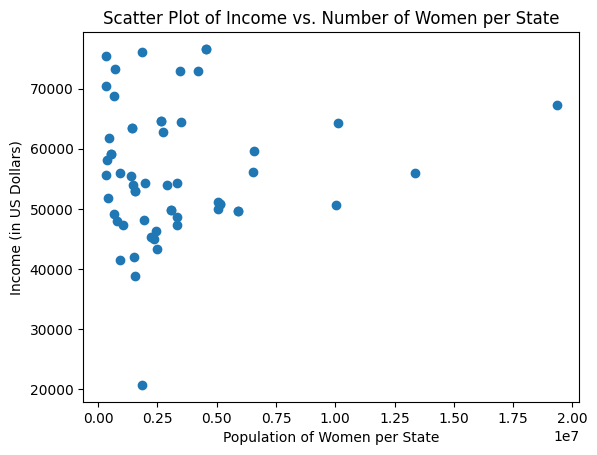

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.scatter(us_census['Women'], us_census['Income'])
plt.title("Scatter Plot of Income vs. Number of Women per State")
plt.xlabel("Population of Women per State")
plt.ylabel("Income (in US Dollars)")
plt.show()
plt.clf()

9. I want to double check your work. I know from experience that these monstrous csv files probably have `nan` values in them! I print out your column with the number of women per state to see.

   I can fill in those `nan`s by using pandas' `.fillna()` function.
   
   I have the `TotalPop` per state, and you have the `Men` per state. As an estimate for the `nan` values in the `Women` column, I could use the `TotalPop` of that state minus the `Men` for that state.
   
   I print out the `Women` column after filling the `nan` values to see if it worked!

In [ ]:
us_census["Women"] = us_census["Women"].fillna(us_census['TotalPop'] - us_census['Men'])
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,64657.80,2648667M_2630239F,2648667,2630239.0
1,1,Connecticut,3593222,15.60%,67.68%,10.35%,0.13%,4.02%,0.02%,76146.56,1751607M_1841615F,1751607,1841615.0
2,2,Delaware,926454,8.82%,64.63%,20.74%,0.26%,3.27%,NaN,61827.98,448413M_478041F,448413,478041.0
3,3,District of Columbia,647484,9.17%,33.10%,51.78%,0.20%,3.38%,0.03%,75466.36,306674M_340810F,306674,340810.0
4,4,Florida,19645772,21.34%,59.08%,15.17%,0.21%,2.28%,0.05%,50690.19,9600009M_10045763F,9600009,10045763.0


10. I forgot to check for duplicates! Use `.duplicated()` on my `census` DataFrame to see if we have duplicate rows in there.

In [ ]:
us_census.duplicated(subset = us_census.columns[1:])

0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5     True
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5     True
0     True
1    False
2    False
3    False
4    False
5     True
0     True
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5     True
dtype: bool

11. I drop those duplicates using the `.drop_duplicates()` function.

In [ ]:
us_census = us_census.drop_duplicates(subset = us_census.columns[1:])
us_census

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,64657.80,2648667M_2630239F,2648667,2630239.0
1,1,Connecticut,3593222,15.60%,67.68%,10.35%,0.13%,4.02%,0.02%,76146.56,1751607M_1841615F,1751607,1841615.0
2,2,Delaware,926454,8.82%,64.63%,20.74%,0.26%,3.27%,NaN,61827.98,448413M_478041F,448413,478041.0
3,3,District of Columbia,647484,9.17%,33.10%,51.78%,0.20%,3.38%,0.03%,75466.36,306674M_340810F,306674,340810.0
4,4,Florida,19645772,21.34%,59.08%,15.17%,0.21%,2.28%,0.05%,50690.19,9600009M_10045763F,9600009,10045763.0
5,5,Georgia,10006693,8.42%,54.29%,32.09%,0.19%,3.10%,0.05%,50811.08,4883331M_5123362F,4883331,5123362.0
0,0,Maryland,5930538,8.47%,52.68%,30.68%,0.20%,5.33%,0.04%,78765.40,2872643M_F,2872643,3057895.0
1,1,Massachusetts,6705586,11.46%,73.04%,6.83%,0.13%,5.84%,0.02%,72838.94,3249650M_3455936F,3249650,3455936.0
2,2,Michigan,9900571,4.63%,72.38%,17.63%,0.48%,2.42%,0.02%,51201.83,4861973M_5038598F,4861973,5038598.0
3,3,Minnesota,5419171,5.15%,81.43%,5.66%,1.07%,4.16%,0.03%,62820.83,2692166M_2727005F,2692166,2727005.0


12. And I make the scatterplot again. Now, it should be perfect! my job is secure, for now.

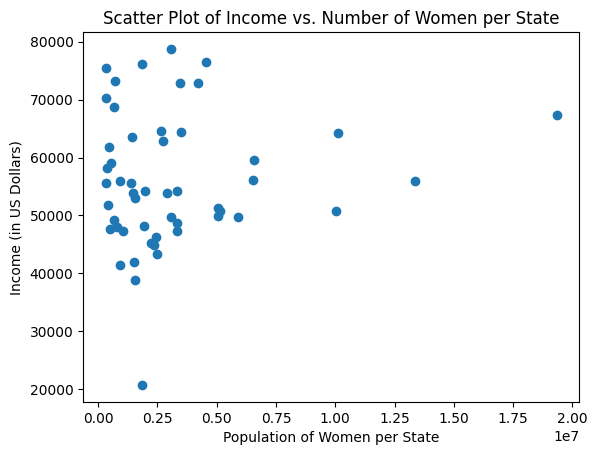

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.scatter(us_census['Women'], us_census['Income'])
plt.title("Scatter Plot of Income vs. Number of Women per State")
plt.xlabel("Population of Women per State")
plt.ylabel("Income (in US Dollars)")
plt.show()
plt.clf()